# **Data Understanding**

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report


2024-05-02 11:22:11.315833: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 11:22:11.315928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 11:22:11.451482: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Data Source 1 :**

In [2]:
df = pd.read_csv("/kaggle/input/honey-bee-pollen/PollenDataset/pollen_data.csv")
df.head()

,Unnamed: 0,filename,pollen_carrying
0,0,P10057-125r.jpg,1
1,1,P57380-120r.jpg,1
2,2,NP63671-221r.jpg,0
3,3,NP53776-47r.jpg,0
4,4,NP13382-201r.jpg,0


Our dataset is composed of two major components: an images directory containing images of bees, some with pollen and some without, and a CSV file containing two labels: the filename of the images and the pollen_carrying label that indicates whether the bee has pollen or not (1 for pollen presence and 0 for pollen absence).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       714 non-null    int64 
 1   filename         714 non-null    object
 2   pollen_carrying  714 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.9+ KB


In [4]:
df['pollen_carrying'] = df['pollen_carrying'].map({0: "No Pollen", 1: "Pollen"})

To convert integers into a string.

In [5]:
print(df.groupby('pollen_carrying').size())

pollen_carrying
No Pollen    345
Pollen       369
dtype: int64


In [6]:
image_path = '../input/honey-bee-pollen/PollenDataset/images/'
df['filename'] = df['filename'].apply(lambda x: image_path / Path(x)).astype(str)

The data that we are working with is balanced; the number of bees carrying pollen and the number of bees that don't are very close, so there's no need for data augmentation at the moment.

**Data Source 2 :**

In [7]:
df2 = pd.read_csv("/kaggle/input/honey-bee-annotated-images/bee_data.csv")
df2.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   file             5172 non-null   object
 1   date             5172 non-null   object
 2   time             5172 non-null   object
 3   location         5172 non-null   object
 4   zip code         5172 non-null   int64 
 5   subspecies       5172 non-null   object
 6   health           5172 non-null   object
 7   pollen_carrying  5172 non-null   bool  
 8   caste            5172 non-null   object
dtypes: bool(1), int64(1), object(7)
memory usage: 328.4+ KB


In [9]:
print(df2.groupby('pollen_carrying').size())

pollen_carrying
False    5154
True       18
dtype: int64


In [10]:
cols = ['file','pollen_carrying']
df2 = df2[cols]

In [11]:
df2 = df2.rename(columns={'file': 'filename'})

In [12]:
random_False = df2[df2['pollen_carrying'] == False].sample(n=40, random_state=42)

True_rows = df2[df2['pollen_carrying'] == True]

result = pd.concat([random_False, True_rows])

# Shuffle the DataFrame
result = result.sample(frac=1, random_state=42).reset_index(drop=True)

result['pollen_carrying'] = result['pollen_carrying'].astype(int)

result['pollen_carrying'] = result['pollen_carrying'].map({0: "No Pollen", 1: "Pollen"})

df2=result

image_path = '../kaggle/input/honey-bee-annotated-images/bee_imgs/bee_imgs/'
df2['filename'] = df2['filename'].apply(lambda x: image_path / Path(x)).astype(str)

df2.head(40)

,filename,pollen_carrying
0,../kaggle/input/honey-bee-annotated-images/bee...,No Pollen
1,../kaggle/input/honey-bee-annotated-images/bee...,No Pollen
2,../kaggle/input/honey-bee-annotated-images/bee...,No Pollen
3,../kaggle/input/honey-bee-annotated-images/bee...,No Pollen
4,../kaggle/input/honey-bee-annotated-images/bee...,Pollen
5,../kaggle/input/honey-bee-annotated-images/bee...,Pollen
6,../kaggle/input/honey-bee-annotated-images/bee...,No Pollen
7,../kaggle/input/honey-bee-annotated-images/bee...,No Pollen
8,../kaggle/input/honey-bee-annotated-images/bee...,Pollen
9,../kaggle/input/honey-bee-annotated-images/bee...,No Pollen


In [13]:
print(df2.groupby('pollen_carrying').size())

pollen_carrying
No Pollen    40
Pollen       18
dtype: int64


Now we have a new CSV file that contains 40 non-carrying pollen images and 18 carrying pollen ones.

In [14]:
df.head(40)

,Unnamed: 0,filename,pollen_carrying
0,0,../input/honey-bee-pollen/PollenDataset/images...,Pollen
1,1,../input/honey-bee-pollen/PollenDataset/images...,Pollen
2,2,../input/honey-bee-pollen/PollenDataset/images...,No Pollen
3,3,../input/honey-bee-pollen/PollenDataset/images...,No Pollen
4,4,../input/honey-bee-pollen/PollenDataset/images...,No Pollen
5,5,../input/honey-bee-pollen/PollenDataset/images...,Pollen
6,6,../input/honey-bee-pollen/PollenDataset/images...,Pollen
7,7,../input/honey-bee-pollen/PollenDataset/images...,No Pollen
8,8,../input/honey-bee-pollen/PollenDataset/images...,No Pollen
9,9,../input/honey-bee-pollen/PollenDataset/images...,Pollen


In [15]:
print(df.size)

2142


# Data Preparation

First we need to transform filnames into the images paths 

In [16]:
 df_train, df_test = train_test_split(df, train_size=0.8, shuffle=True, random_state=0)

In the previous cell, we aimed to split our dataset into training and testing datasets. Setting the shuffle parameter to true means that the data will be taken randomly (without the need for a random_state)

In [17]:
# Create training generator
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],
    channel_shift_range=100,  # Adjust this value based on the desired intensity of the yellow color
    validation_split=0.2
)


# Create test generator
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

channel_shift_range is set to 100, which means that the values of the red and green channels will be randomly shifted by up to 100 intensity levels. This will emphasize the yellow color in the images by increasing the intensity of the red and green channels, as yellow is a combination of red and green light

We are going to work on data generators, which are part of TensorFlow's Keras API. This method helps us load and preprocess large datasets. Our dataset consists of 700 images, which can sometimes be large.

**Note: There is no need for rotation in the preprocessing for the moment, as the images are already in the correct orientation.**

Now we can flow the images from the generators with the paths.

In [18]:
train_images = train_generator.flow_from_dataframe(
    dataframe=df_train,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)
val_images = train_generator.flow_from_dataframe(
    dataframe=df_train,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)
test_images = test_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 457 validated image filenames belonging to 2 classes.
Found 114 validated image filenames belonging to 2 classes.
Found 143 validated image filenames belonging to 2 classes.


**Important points**

* DataFrame: The source dataset.
* class_mode: Classification mode (usually set to binary when it's a 2-item classification).
* batch_size: The size of the batches of data.
* shuffle: When set to one, it ensures that the samples are randomly taken.
* seed: The random seed.
* subset: The use case of the generated data.

# Display images

We need to understand the shape and the type of images 

In [19]:
train_images[0][0].shape

(32, 224, 224, 3)

* The 32 reffers to the size of the batch .
* The 224,224 reffers to the size of images (224 x 224 pixels ).
* The 3 reffers to 3 layers , 3 channels (RGB)

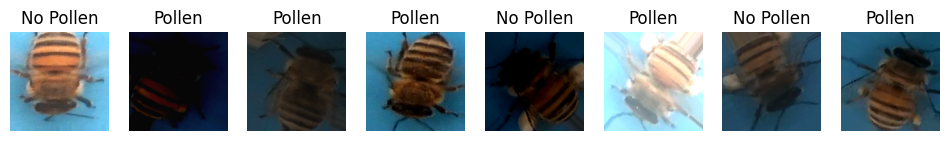

In [20]:
plt.figure(figsize=(12,6))

for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(train_images[0][0][i+12])
    plt.title("No Pollen" if test_images.labels[i+12] == 0 else "Pollen")
    plt.axis('off')
    
plt.show()

# Training

* The pollen sacks can be really small or out of the frame depending on the picture. This might result in prediction errors.
* We are going to create a Convolutional Neural Network .
* The images will be doing **filtering** and **pooling** until the number of features are reduced.
* The classification is then made by a standard neural network.

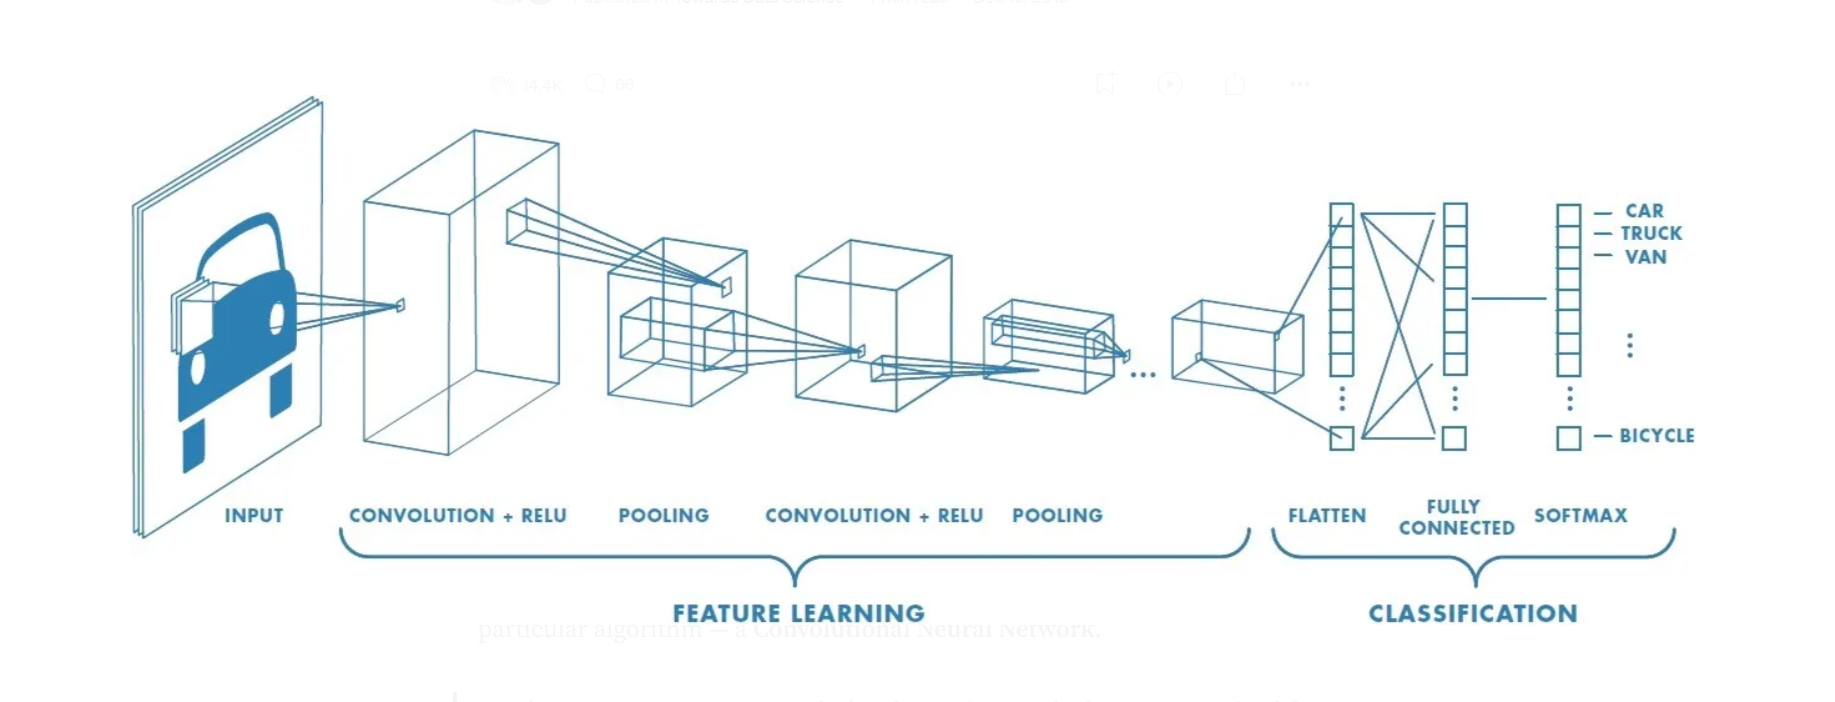

**Extract the features**

In [21]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)


* Layer 1 : Filter with Conv2D layers and detect with relu activation.
* Layer 2 : Condense with MaxPool2D.( reduces the number of features by losing information)
* Layer 3 : Same as layer 1 but with more filters to extract more features.
* Layer 4 : condense with MaxPool2D.
* Layer 5 :Global Average Pooling reduces the features to 1D by taking the average over the first two dimensions of each 32 filters.

**Classifie (standard neural network)**

In [22]:
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

* Two dense layers added to the neural network architecture, with 128 units using the Relu activation function (max(x,0)).
*  A final dense layer with a single unit is added, employing the sigmoid activation function used for binary classification tasks (giving a prediction (probability) between 0 and 1).

Now, after creating our own customized model, we will start the training.

In [23]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# History
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-05-02 11:22:36.634572: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49295: 4.25514, expected 3.61721
2024-05-02 11:22:36.634630: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49296: 5.13285, expected 4.49491
2024-05-02 11:22:36.634639: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49346: 5.29403, expected 4.65609
2024-05-02 11:22:36.634647: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49349: 5.09757, expected 4.45964
2024-05-02 11:22:36.634655: E external/local_xla/xla/service/gpu/buffer_

 1/15 ━━━━━━━━━━━━━━━━━━━━ 2:22 10s/step - accuracy: 0.3750 - loss: 0.6992

I0000 00:00:1714648959.715124     104 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 5/15 ━━━━━━━━━━━━━━━━━━━━ 4s 442ms/step - accuracy: 0.4130 - loss: 0.6966

2024-05-02 11:22:42.208644: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49285: 6.26153, expected 5.44882
2024-05-02 11:22:42.208695: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49286: 6.15561, expected 5.34289
2024-05-02 11:22:42.208705: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49287: 7.09436, expected 6.28164
2024-05-02 11:22:42.208713: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49288: 5.33438, expected 4.52166
2024-05-02 11:22:42.208720: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49289: 5.57214, expected 4.75942
2024-05-02 11:22:42.208728: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49290: 5.38216, expected 4.56944
2024-05-02 11:22:42.208736: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49291: 5.14846, expected 4.33574
2024-05-02 11:22:42.208743:

14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.4520 - loss: 0.6951

2024-05-02 11:22:46.840841: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 5.47156, expected 4.74223
2024-05-02 11:22:46.840906: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 6.2134, expected 5.48407
2024-05-02 11:22:46.840932: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 6.13608, expected 5.40675
2024-05-02 11:22:46.840948: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 28: 6.02844, expected 5.29911
2024-05-02 11:22:46.840960: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 83: 6.01627, expected 5.28694
2024-05-02 11:22:46.840971: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 180: 5.86975, expected 5.14042
2024-05-02 11:22:46.840983: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 198: 5.8874, expected 5.15807
2024-05-02 11:22:46.840993: E external/local_xla

15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 565ms/step - accuracy: 0.4581 - loss: 0.6949 - val_accuracy: 0.5088 - val_loss: 0.6930
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - accuracy: 0.5776 - loss: 0.6904 - val_accuracy: 0.5088 - val_loss: 0.6919
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - accuracy: 0.5182 - loss: 0.6921 - val_accuracy: 0.5088 - val_loss: 0.6901
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - accuracy: 0.5294 - loss: 0.6908 - val_accuracy: 0.5965 - val_loss: 0.6920
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.5152 - loss: 0.6933 - val_accuracy: 0.5088 - val_loss: 0.6907
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - accuracy: 0.5273 - loss: 0.6921 - val_accuracy: 0.6053 - val_loss: 0.6898
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.5596 - loss: 0.6903 - val_accuracy: 0.5088 - val_loss: 0.6914
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.5149 - loss: 0.6923 - val_accuracy: 0.578

The model has stopped when starting to overfit, thanks to the callbacks ( after 5 epochs of the val_loss not improving). It keeps the parameters of the lowest validation loss (vall_loss).


We want a model that is able to perform a high score on new data (the validation data), and not on the training data only (overfitting).

# Testing 

Now we will run our model with different data (not training or validation data )

In [24]:
results = model.evaluate(test_images, verbose=0)
print("Accuracy: {:.2f} %".format(results[1] * 100))

2024-05-02 11:28:06.136828: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49286: 7.99239, expected 7.05484
2024-05-02 11:28:06.136885: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49287: 7.67291, expected 6.73536
2024-05-02 11:28:06.136894: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49288: 7.80895, expected 6.8714
2024-05-02 11:28:06.136902: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49290: 6.83391, expected 5.89635
2024-05-02 11:28:06.136910: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49291: 6.48434, expected 5.54679
2024-05-02 11:28:06.136918: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49292: 7.11584, expected 6.17829
2024-05-02 11:28:06.136926: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49293: 7.09259, expected 6.15504
2024-05-02 11:28:06.136933: 

Accuracy: 69.93 %


Our model gives us good results with new data . There is no overfiting .

For more evaluation of our model , we will explore the confusion matrix , the Classification Report

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


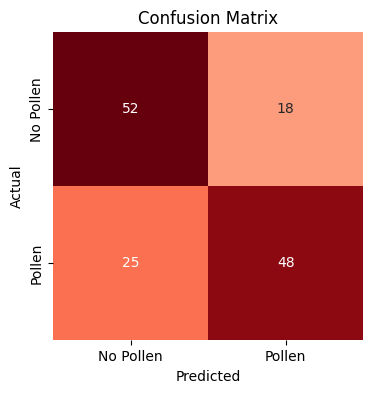

Classification Report:
----------------------
               precision    recall  f1-score   support

   No Pollen       0.68      0.74      0.71        70
      Pollen       0.73      0.66      0.69        73

    accuracy                           0.70       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.70      0.70      0.70       143



In [25]:
predictions = np.squeeze(model.predict(test_images) >= 0.5).astype(int)
cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["No Pollen", "Pollen"])
# Display
plt.figure(figsize=(4, 4))

sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["No Pollen", "Pollen"])
plt.yticks(ticks=[0.5, 1.5], labels=["No Pollen", "Pollen"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

print("Classification Report:\n----------------------\n", clr)

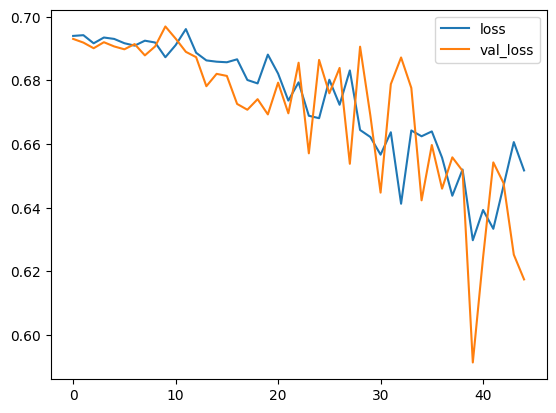

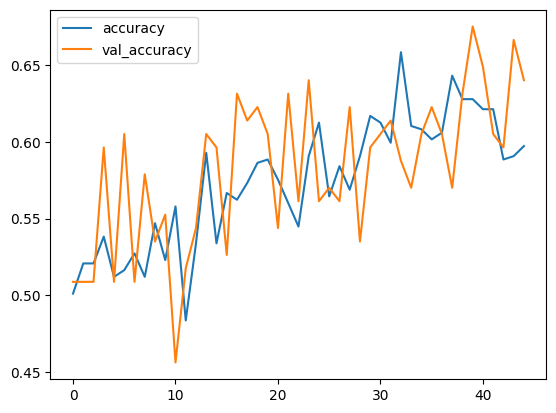

In [26]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

The learning curves in this model stayed close together for much longer. This suggests that the augmentation helped prevent overfitting, allowing the model to continue improving.